# EDA

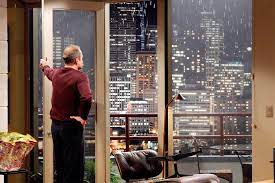

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [312]:
df=pd.read_csv(r"C:\Users\T495\Desktop\Floppy\Neue_Fische\EDA_project\ds-eda-project-Florencia\data\eda.csv")


In [4]:
df.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# check if 'id' and 'id.1' might be duplicates:
df['house_id'].equals(df['id.1'])                               # They are!

df.drop(columns='id.1', inplace=True)                         # drop one of them !

In [6]:
df.shape

(21597, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   bedrooms       21597 non-null  float64
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  float64
 7   sqft_lot       21597 non-null  float64
 8   floors         21597 non-null  float64
 9   waterfront     19206 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  float64
 14  sqft_basement  21145 non-null  float64
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17749 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [8]:
df.describe()

,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,...,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,...,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,6234.661,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,...,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,5400.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,10799.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,16198.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,21597.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


In [9]:
df.head(20)

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,3.000,1.000,1180.000,5650.000,1.000,NaN,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,3.000,2.250,2570.000,7242.000,2.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,2.000,1.000,770.000,10000.000,1.000,0.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,4.000,3.000,1960.000,5000.000,1.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,3.000,2.000,1680.000,8080.000,1.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
5,2014-05-12,1230000.000,7237550310,6,4.000,4.500,5420.000,101930.000,1.000,0.000,...,11,3890.000,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000
6,2014-06-27,257500.000,1321400060,7,3.000,2.250,1715.000,6819.000,2.000,0.000,...,7,1715.000,NaN,1995,0.000,98003,47.310,-122.327,2238.000,6819.000
7,2015-01-15,291850.000,2008000270,8,3.000,1.500,1060.000,9711.000,1.000,0.000,...,7,1060.000,0.000,1963,0.000,98198,47.410,-122.315,1650.000,9711.000
8,2015-04-15,229500.000,2414600126,9,3.000,1.000,1780.000,7470.000,1.000,0.000,...,7,1050.000,730.000,1960,0.000,98146,47.512,-122.337,1780.000,8113.000
9,2015-03-12,323000.000,3793500160,10,3.000,2.500,1890.000,6560.000,2.000,0.000,...,7,1890.000,0.000,2003,0.000,98038,47.368,-122.031,2390.000,7570.000


In [10]:
# check how many duplicated rows exist in the data frame
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [11]:
# check data types in data frame
df.dtypes

date              object
price            float64
house_id           int64
id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [12]:
# type of first date entry
type(df['date'][0])

# change "date" dtype to datetime with format %Y/%m/%d

df['date'] = pd.to_datetime(df['date'])
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
# Check for NaN

df.isna().sum()

# It seems like there are many NaN in yr_renovated, usually this means googling that they were not renovated, woll change them for a cero. 
# Similar with sqrt basement, I will asume they just do not have one. 
# For water front the same, anyways this are not relevant variables, I think for my analysis. 
# If the view is not rated, the home probably doesn’t have a notable view ?? For this I am not so sure...



date                0
price               0
house_id            0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

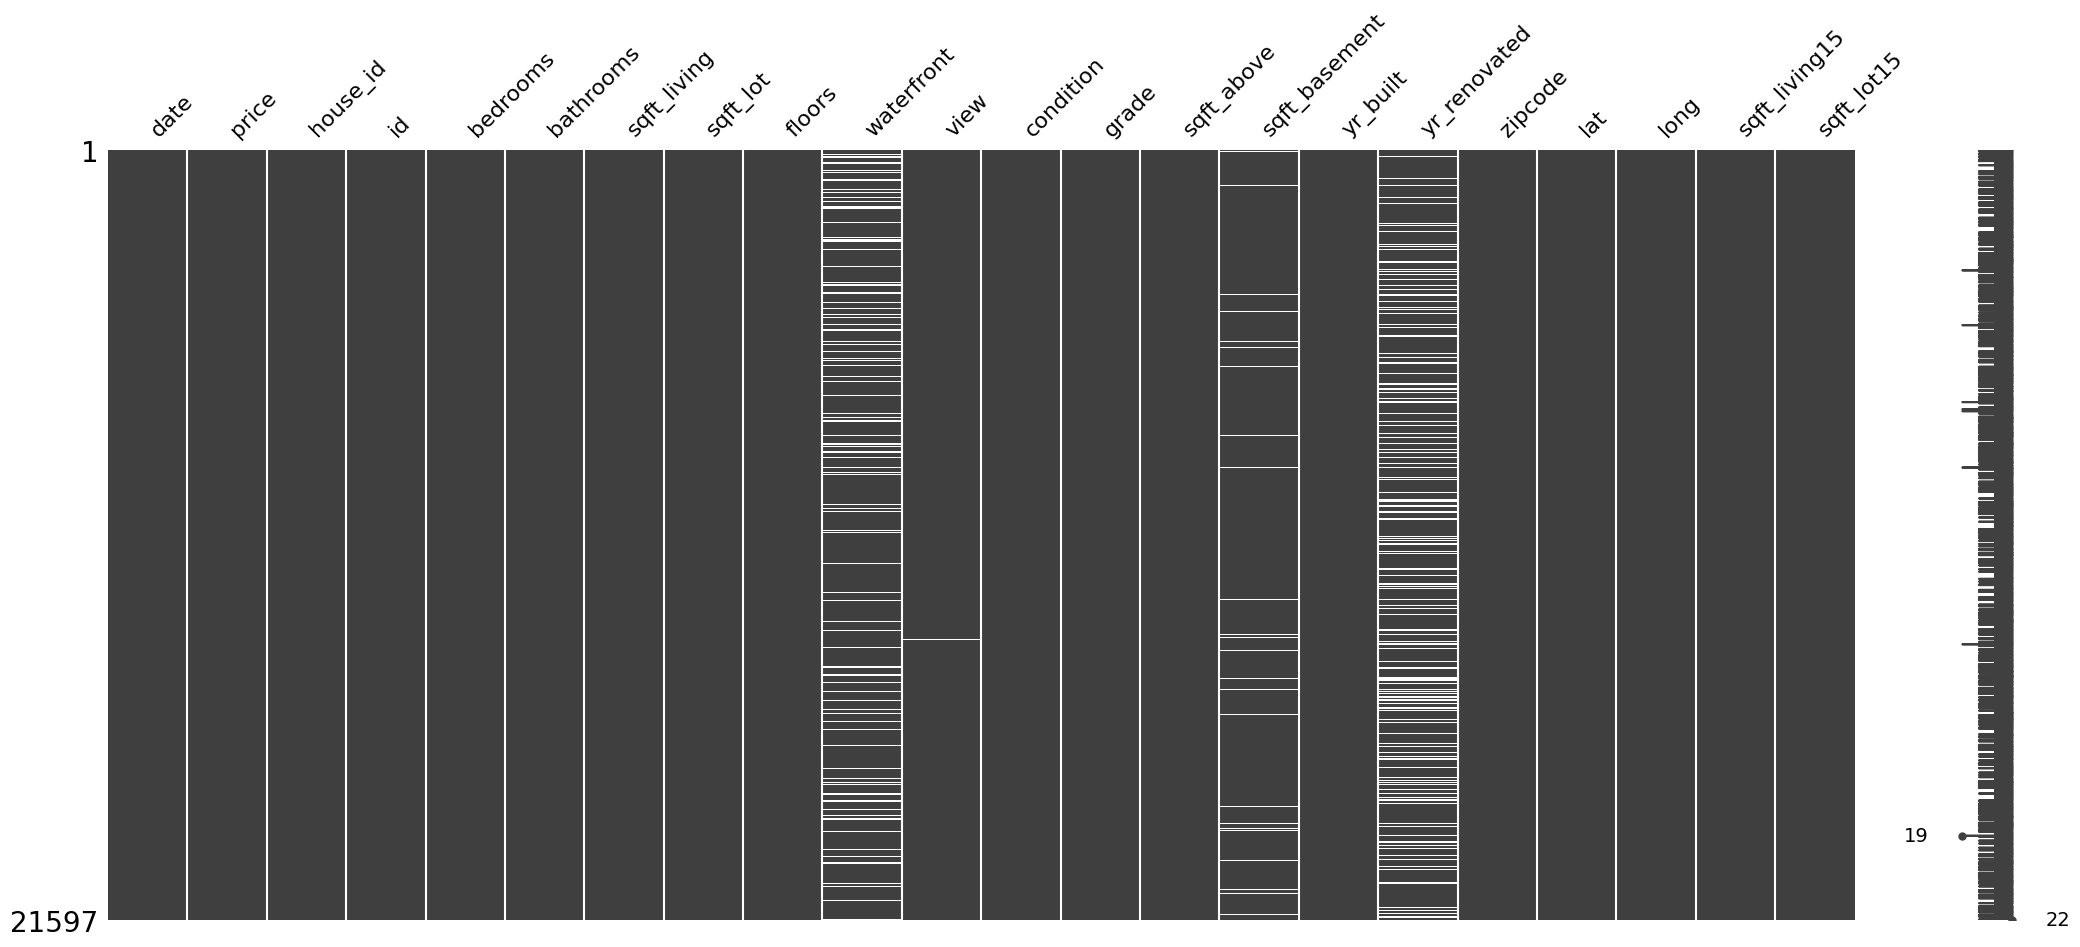

In [14]:
import missingno as msno
import matplotlib.pyplot as plt

# Plot the missing value matrix
msno.matrix(df)
plt.show()

<Axes: >

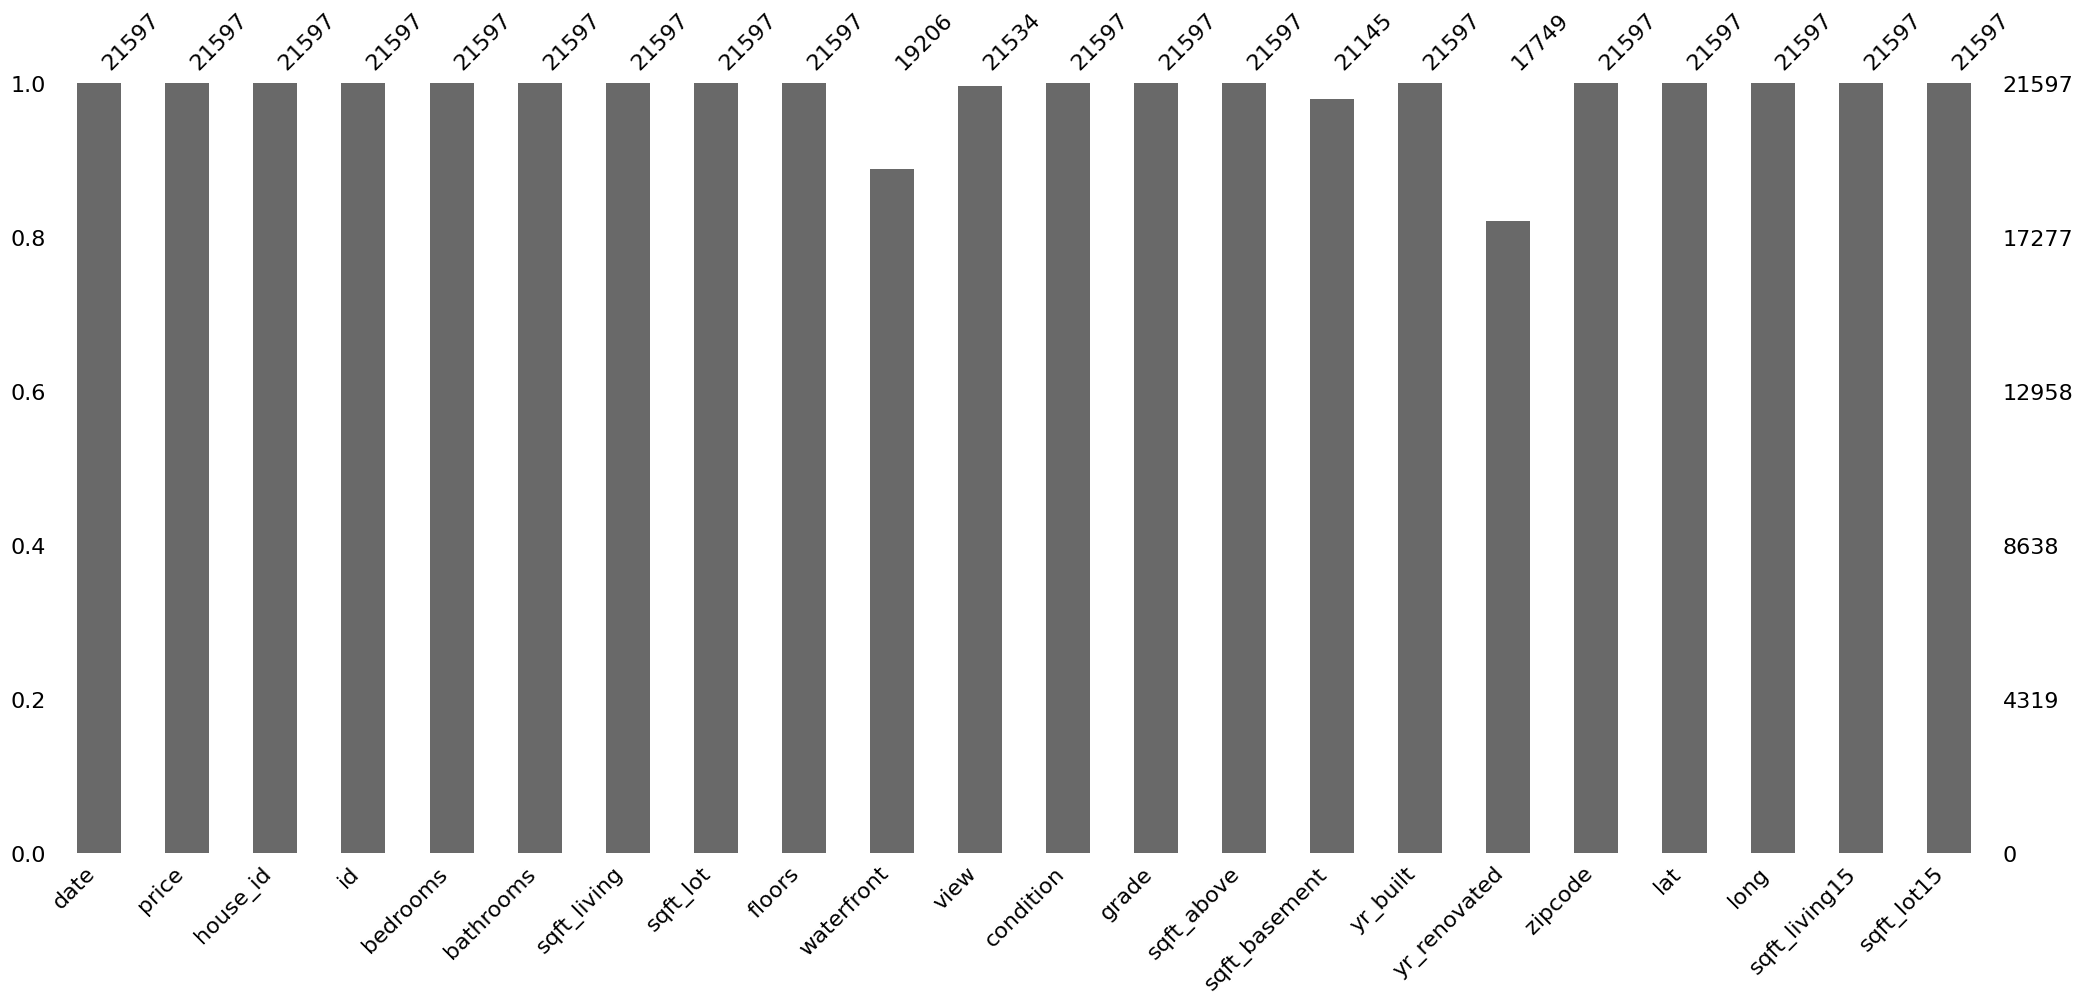

In [15]:
msno.bar(df)

In [16]:
#Fill all missing data with ceros

df = df.fillna(0)

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'house_id'}>,
        <Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_l

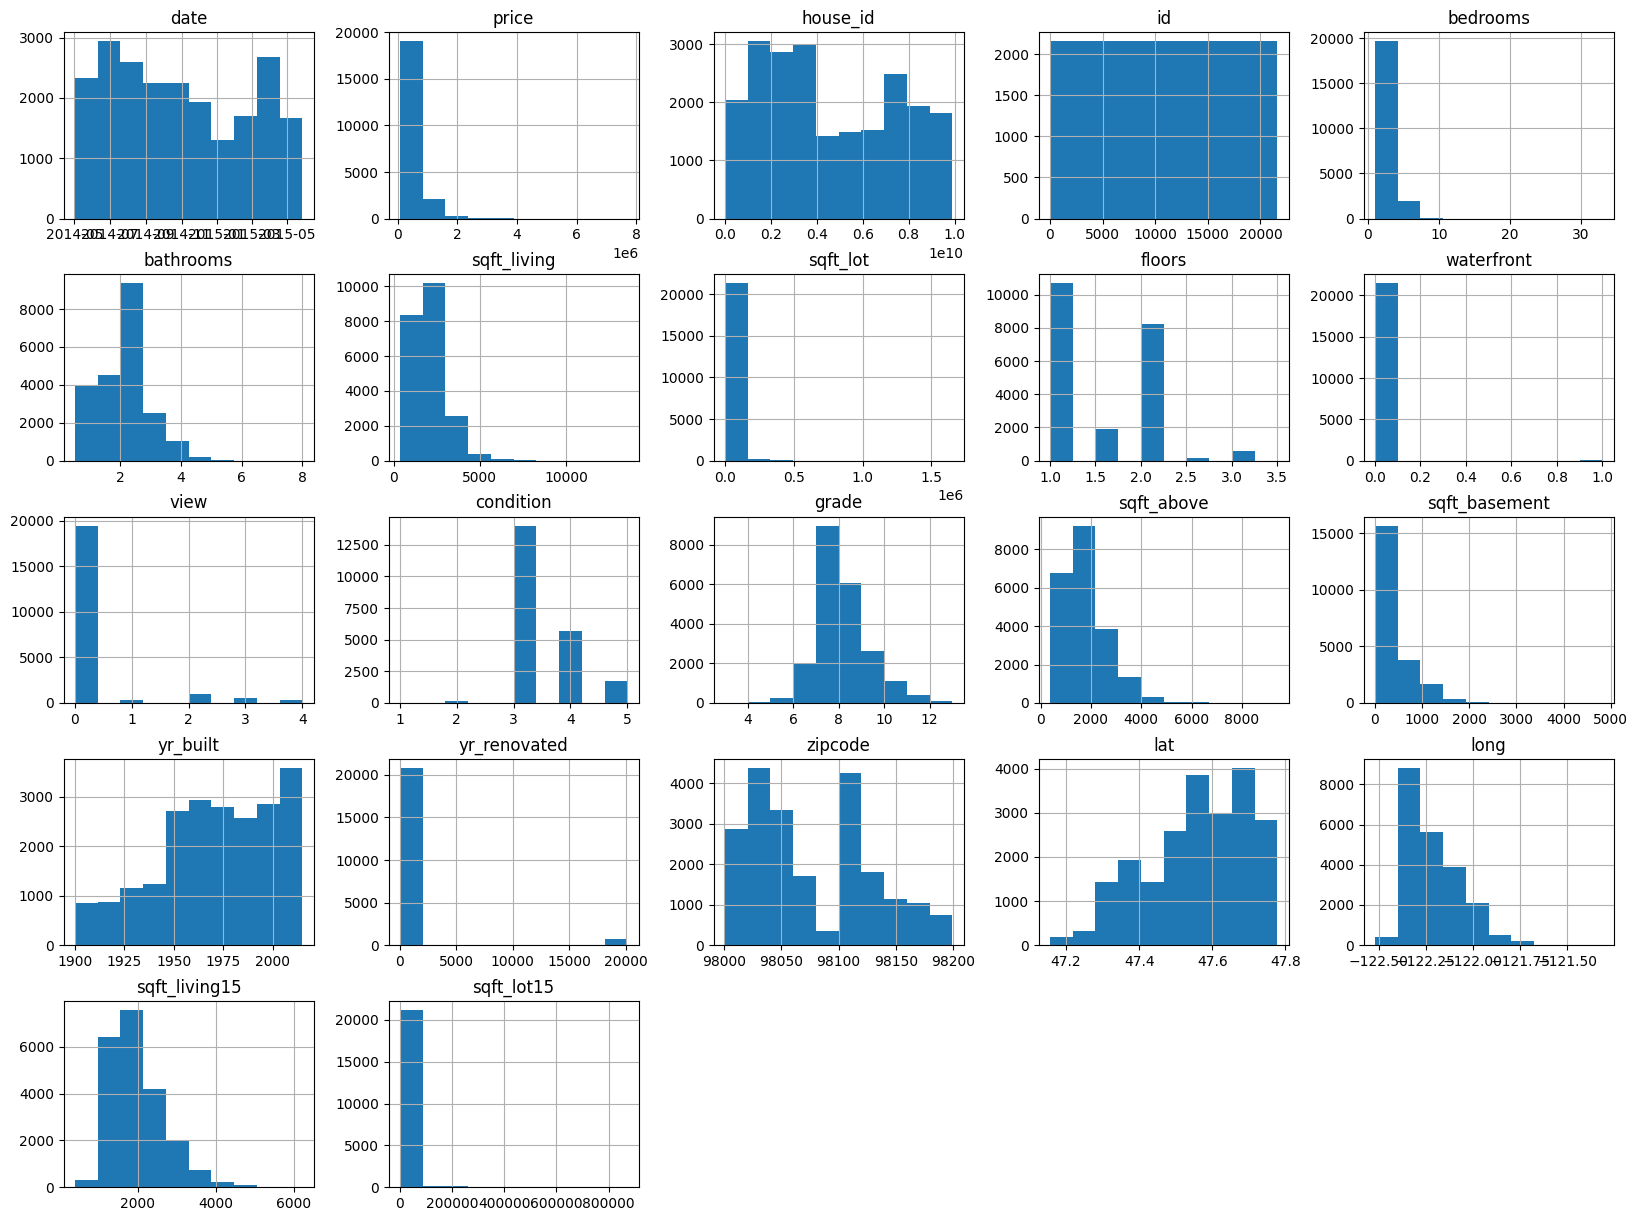

In [17]:
df.hist(figsize=(20,15))

In [ ]:
# To find which are poor neighborhoods, maybe a good idea is to check the avg price of houses for each zip code and look for the lowest 

zip_price_median = df.groupby('zipcode')['price'].median().sort_values()
poor_zipcodes = zip_price_median.head(20)  # Bottom 20 zip codes
poor_zipcodes
#poor_zipcodes = zip_price_median.head(10).index  # Bottom 10 zip codes

zipcode
98002   235000.000
98168   235000.000
98032   249000.000
98001   260000.000
98188   264000.000
98198   265000.000
98003   267475.000
98023   268450.000
98148   278000.000
98178   278277.000
98022   280000.000
98030   282255.000
98031   288000.000
98042   291500.000
98055   294950.000
98146   305000.000
98092   309780.000
98106   315000.000
98058   335000.000
98038   342000.000
Name: price, dtype: float64

Client: Erin Robinson

H1: Prices vary significantly by ZIP code 
H2: Low-price neighborhoods have lower grade/condition houses
H3: Older homes built, that haven’t been renovated are cheaper than newer homes of the same size

# Do prices vary significantely with ZIP code?

<Axes: xlabel='zipcode', ylabel='price'>

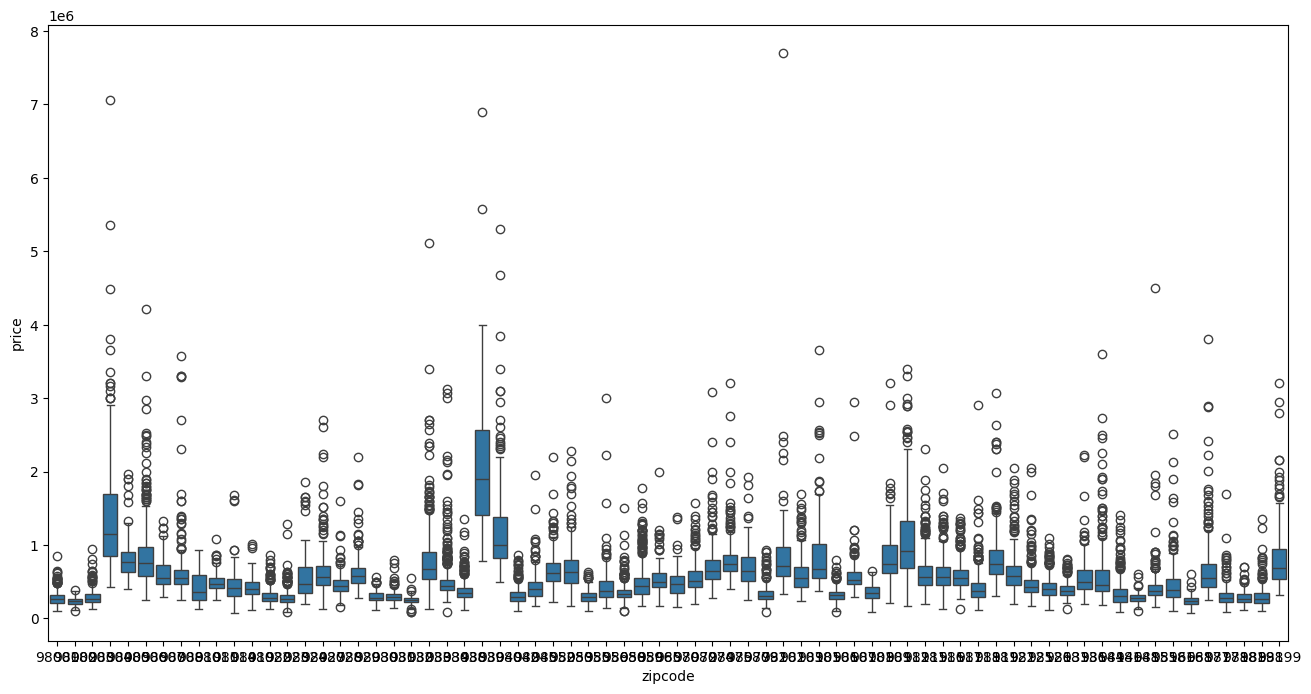

In [19]:


df.groupby('zipcode')['price'].mean().sort_values()

plt.figure(figsize=(16, 8))
sns.boxplot(x='zipcode', y='price', data=df[df['zipcode'].isin(df['zipcode'].value_counts().index)])


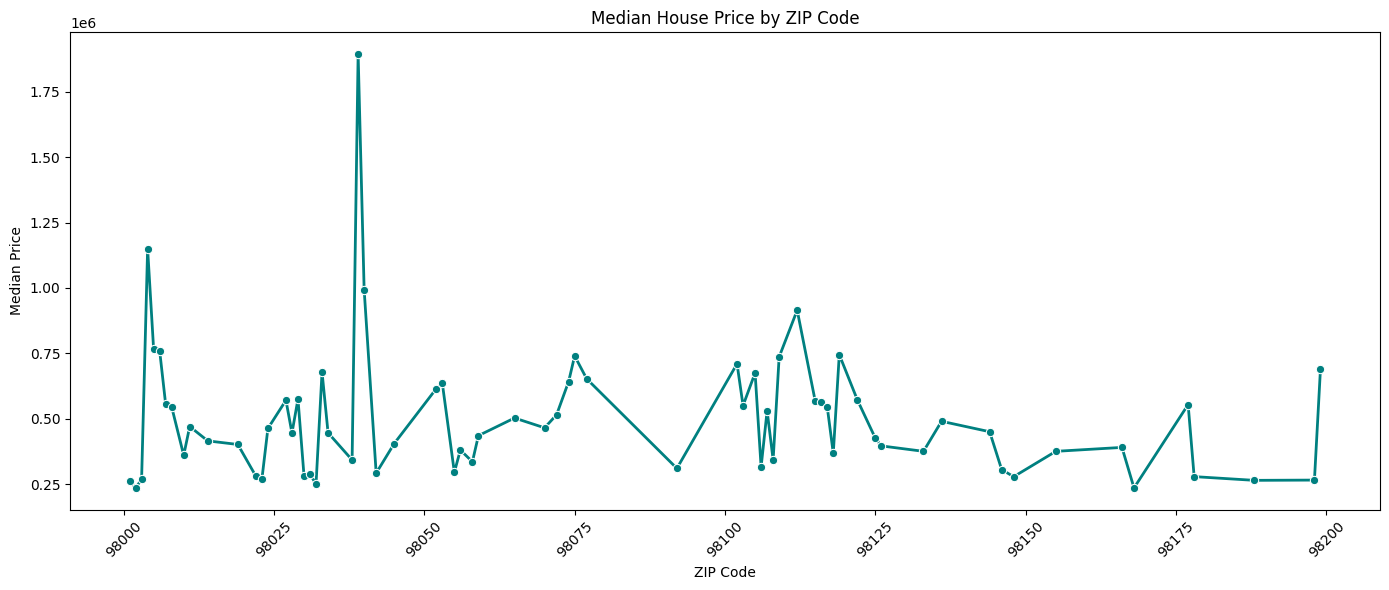

In [20]:
# Compute median price per ZIP
zip_price_median = df.groupby('zipcode')['price'].median().reset_index()

# Sort ZIPs by price for a smooth line
zip_price_median = zip_price_median.sort_values('price')

# Plot line
plt.figure(figsize=(14, 6))
sns.lineplot(data=zip_price_median, x='zipcode', y='price', marker='o', linewidth=2, color='teal')
plt.xticks(rotation=45)
plt.title('Median House Price by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Median Price')
plt.tight_layout()
plt.show()

# Do low-price neighborhoods have lower grade/condition houses ? 

In [21]:
zip_summary = df.groupby('zipcode').agg({
    'price': 'median',
    'sqft_living': 'median',
    'grade': 'mean',
    'condition': 'mean'
})

# Calculate median price per sqft
zip_summary['price_per_sqft'] = zip_summary['price'] / zip_summary['sqft_living']


In [22]:


zip_summary = zip_summary.sort_values('price_per_sqft')
zip_summary



,price,sqft_living,grade,condition,price_per_sqft
zipcode,,,,,
98001,260000.000,1824.000,7.296,3.335,142.544
98023,268450.000,1880.000,7.575,3.387,142.793
98032,249000.000,1720.000,7.144,3.632,144.767
98092,309780.000,2120.000,7.852,3.319,146.123
98002,235000.000,1570.000,6.693,3.744,149.682
...,...,...,...,...,...
98102,710000.000,1780.000,8.298,3.375,398.876
98109,736000.000,1840.000,8.018,3.477,400.000
98119,744975.000,1800.000,8.022,3.375,413.875


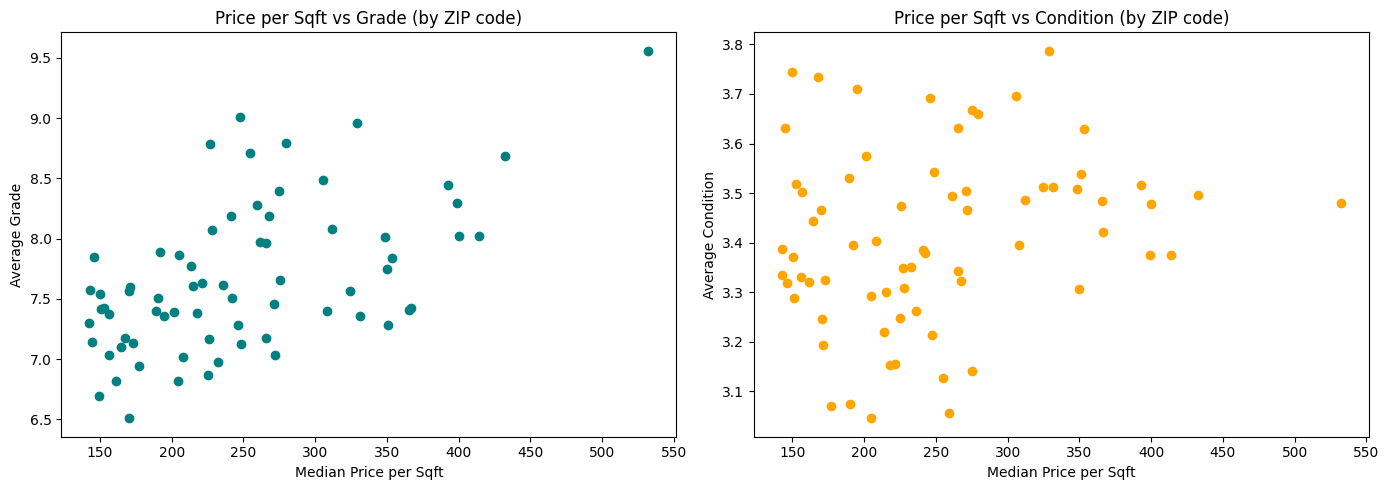

In [ ]:


plt.figure(figsize=(14, 5))

# Grade
plt.subplot(1, 2, 1)
plt.scatter(zip_summary['price_per_sqft'], zip_summary['grade'], color='teal')
plt.title('Price per Sqft vs Grade (by ZIP code)')
plt.xlabel('Median Price per Sqft')
plt.ylabel('Average Grade')

# Condition
plt.subplot(1, 2, 2)
plt.scatter(zip_summary['price_per_sqft'], zip_summary['condition'], color='orange')
plt.title('Price per Sqft vs Condition (by ZIP code)')
plt.xlabel('Median Price per Sqft')
plt.ylabel('Average Condition')

plt.tight_layout()
plt.show()



# Older houses, not renovated, are cheaper than newer homes of the same size

In [24]:
# Renovation flag

df['renovated'] = df['yr_renovated'] > 0

# Filter non renovated houses

unrenovated_df = df[df['renovated'] == False]


In [25]:
# Age groups

unrenovated_df['age_group'] = pd.cut(
    unrenovated_df['yr_built'],
    bins=[0, 1950, 1970, 1990, 2010, 2025],
    labels=['<1950', '1950-70', '1970-90', '1990-2010', '2010+']
)


In [26]:
filtered = unrenovated_df[
    (unrenovated_df['sqft_living'] >= 1200) & 
    (unrenovated_df['sqft_living'] <= 1500)
]


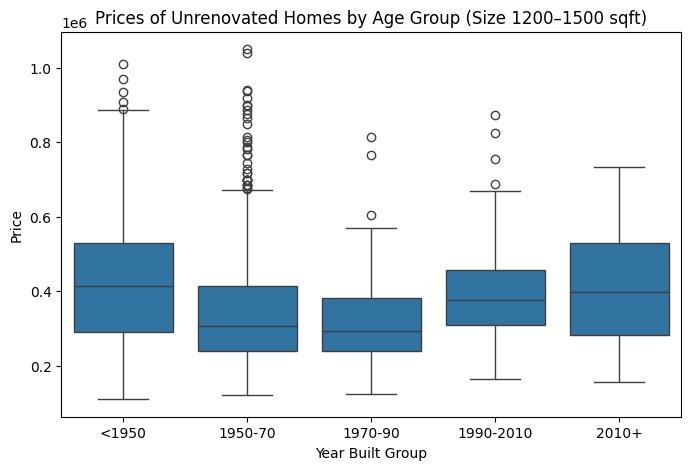

In [27]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='age_group', y='price', data=filtered)
plt.title('Prices of Unrenovated Homes by Age Group (Size 1200–1500 sqft)')
plt.xlabel('Year Built Group')
plt.ylabel('Price')
plt.show()


In [28]:
median_size = df['sqft_living'].median()
q1 = df['sqft_living'].quantile(0.25)
q3 = df['sqft_living'].quantile(0.75)
print(f"Q1: {q1}, Median: {median_size}, Q3: {q3}")


Q1: 1430.0, Median: 1910.0, Q3: 2550.0


In [29]:
filtered = unrenovated_df[
    (unrenovated_df['sqft_living'] >= q1) &
    (unrenovated_df['sqft_living'] <= q3)
]

filtered.size

252360

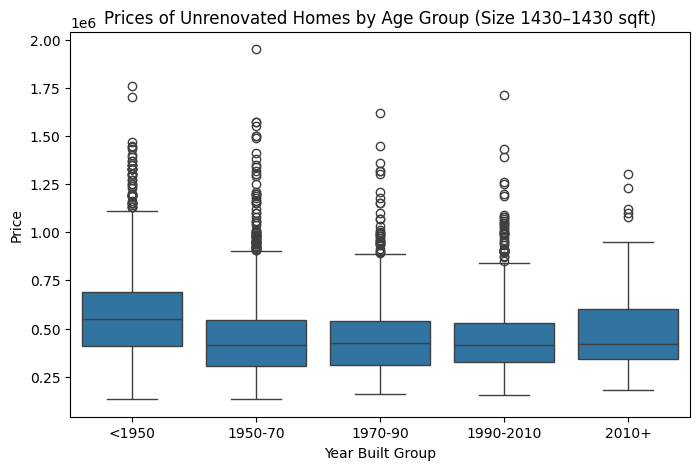

In [30]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='age_group', y='price', data=filtered)
plt.title('Prices of Unrenovated Homes by Age Group (Size 1430–1430 sqft)')
plt.xlabel('Year Built Group')
plt.ylabel('Price')
plt.show()

In [31]:
# "Low-price neighborhoods have lower grade/condition homes."

df['condition'].max()
#df['condition'].min()
#df['grade'].max()
#df['grade'].min()
#df.groupby('zipcode')[['price', 'grade', 'condition']].mean().sort_values(by='price')



np.int64(5)

# Among cheaper homes, older unrenovated houses are cheaper than newer ones of similar size.

In [35]:
# Bottom 25% of prices
price_q1 = df['price'].quantile(0.25)
cheap_houses = df[df['price'] <= price_q1]

print("I consider",len(cheap_houses), "houses")

# Median size of these cheap houses
typical_size = cheap_houses['sqft_living'].median()
print(f"Median size of cheap homes: {typical_size}")


I consider 5406 houses
Median size of cheap homes: 1420.0


In [36]:
#Let’s allow ±100 sqft around that value:
size_window = 100
min_size = typical_size - size_window
max_size = typical_size + size_window

# Filter all houses in this size range
similar_size_homes = df[
    (df['sqft_living'] >= min_size) &
    (df['sqft_living'] <= max_size)
]


In [37]:
# Renovated flag
similar_size_homes['renovated'] = similar_size_homes['yr_renovated'] > 0

# Only unrenovated homes
unrenovated = similar_size_homes[similar_size_homes['renovated'] == False]

# Age groups
unrenovated['age_group'] = pd.cut(
    unrenovated['yr_built'],
    bins=[0, 1950, 1970, 1990, 2010, 2025],
    labels=['<1950', '1950-70', '1970-90', '1990-2010', '2010+']
)


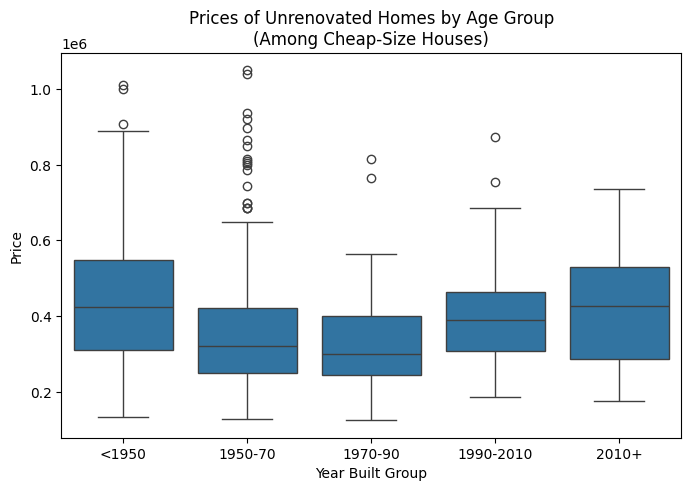

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='age_group', y='price', data=unrenovated)
plt.title('Prices of Unrenovated Homes by Age Group\n(Among Cheap-Size Houses)')
plt.xlabel('Year Built Group')
plt.ylabel('Price')
plt.show()


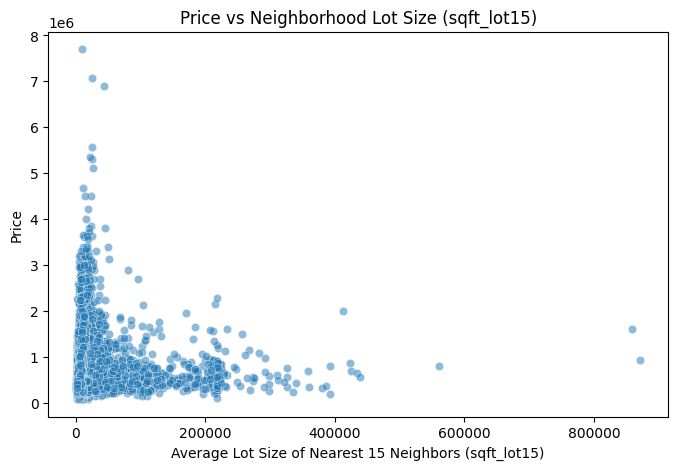

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x='sqft_lot15', y='price', data=df, alpha=0.5)
plt.title('Price vs Neighborhood Lot Size (sqft_lot15)')
plt.xlabel('Average Lot Size of Nearest 15 Neighbors (sqft_lot15)')
plt.ylabel('Price')
plt.show()

Question 1:  “Where can I find the cheapest homes in neighborhoods that need help?”

In [132]:
# Calculate price per square foot for each house

df['price_per_sqft'] = df['price'] / df['sqft_living']

# Goup by ZIP code

zip_price = df.groupby('zipcode')['price_per_sqft'].median()



In [133]:
# Calculate average condition and grade per ZIP code

zip_condition = df.groupby('zipcode')['condition'].mean()
zip_grade = df.groupby('zipcode')['grade'].mean()


In [134]:
# Combine into one DataFrame

zip_summary = pd.DataFrame({
    'median_price_per_sqft': zip_price,
    'avg_condition': zip_condition
})


In [135]:
# Filter ZIP codes with low price and low condition (thresholds can be adjusted)
target_zipcodes = zip_summary[
    (zip_summary['median_price_per_sqft'] < zip_summary['median_price_per_sqft'].quantile(0.25)) &  # cheapest 25%
    (zip_summary['avg_condition'] < 3.5)  # condition lower than 4
]

print(target_zipcodes)

         median_price_per_sqft  avg_condition
zipcode                                      
98001                  147.141          3.335
98003                  154.819          3.371
98023                  144.970          3.387
98030                  152.174          3.289
98038                  170.926          3.194
98055                  173.899          3.325
98058                  173.077          3.466
98092                  149.180          3.319
98148                  181.423          3.070
98168                  164.726          3.245
98178                  176.623          3.321
98188                  163.897          3.331
98198                  171.953          3.443


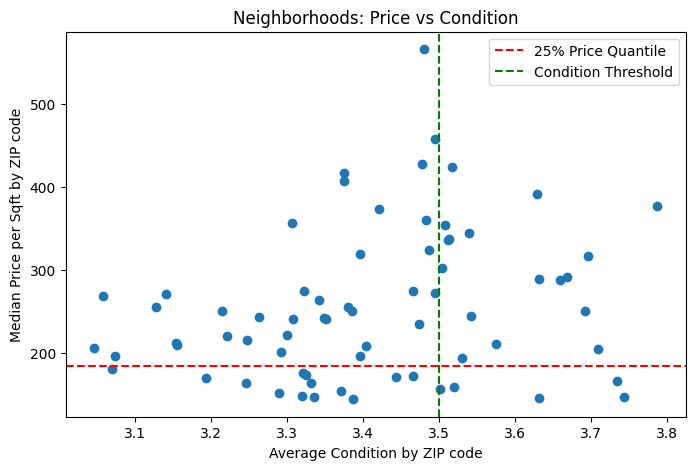

In [136]:
#  Plot for visualization
plt.scatter(zip_summary['avg_condition'], zip_summary['median_price_per_sqft'])
plt.xlabel('Average Condition by ZIP code')
plt.ylabel('Median Price per Sqft by ZIP code')
plt.title('Neighborhoods: Price vs Condition')
plt.axhline(zip_summary['median_price_per_sqft'].quantile(0.25), color='r', linestyle='--', label='25% Price Quantile')
plt.axvline(3.5, color='g', linestyle='--', label='Condition Threshold')
plt.legend()
plt.show()


In [291]:
# 1. Filter original DataFrame for the target ZIP codes
filtered_df = df[df['zipcode'].isin(target_zipcodes.index)]

# 2. Create box plots of price per sqft by ZIP code
plt.figure(figsize=(14, 6))
sns.boxplot(x='zipcode', y='price_per_sqft', data=filtered_df)
plt.title('Price per Sqft Distribution in Target ZIP Codes')
plt.xticks(rotation=45)
plt.ylabel('Price per Sqft')
plt.xlabel('ZIP Code')
plt.tight_layout()
plt.show()


NameError: name 'target_zipcodes' is not defined

Within the poor neighborhoods that I found, Are there undervalued homes compared to others nearby that I can improve affordably?

In [56]:
list_poor_zip_codes = poor_zipcodes.index.tolist()
df_poor = df[df['zipcode'].isin(list_poor_zip_codes)]
df_poor


df_poor['price_per_sqft'] = df_poor['price'] / df_poor['sqft_living']

# Now calculate ZIP-level medians:
zip_medians = df_poor.groupby('zipcode')['price_per_sqft'].median().reset_index()
zip_medians.columns = ['zipcode', 'median_ppsqft']

In [57]:
# Merge back to main df_poor
df_poor = df_poor.merge(zip_medians, on='zipcode')

# Find homes that are under the local median (e.g. 20% or more below)
df_poor['undervalued'] = df_poor['price_per_sqft'] < 0.8 * df_poor['median_ppsqft']
undervalued_homes = df_poor[df_poor['undervalued']]

In [58]:
undervalued_targets = undervalued_homes[
    (undervalued_homes['yr_renovated'] == 0) &  # never renovated
    (undervalued_homes['condition'] <= 3)       # fair or poor condition
]

undervalued_targets

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,price_per_sqft,median_ppsqft,undervalued
3,2015-04-15,229500.000,2414600126,9,3.000,1.000,1780.000,7470.000,1.000,0.000,...,0.000,98146,47.512,-122.337,1780.000,8113.000,False,128.933,201.821,True
17,2015-04-07,301000.000,2799800710,58,3.000,2.500,2420.000,4750.000,2.000,0.000,...,0.000,98042,47.366,-122.122,2690.000,4750.000,False,124.380,159.248,True
37,2015-01-08,171800.000,3454800060,119,4.000,2.000,1570.000,9600.000,1.000,0.000,...,0.000,98168,47.496,-122.303,1880.000,9000.000,False,109.427,164.726,True
42,2014-08-05,220000.000,3655000070,137,4.000,1.750,2020.000,7840.000,1.000,0.000,...,0.000,98003,47.331,-122.299,1750.000,8140.000,False,108.911,154.819,True
49,2014-05-07,255000.000,84000105,161,5.000,2.250,2060.000,8632.000,1.000,0.000,...,0.000,98146,47.488,-122.335,1010.000,11680.000,False,123.786,201.821,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,2014-08-04,325000.000,2309710150,21358,4.000,3.250,2800.000,5291.000,2.000,0.000,...,0.000,98022,47.194,-121.977,2380.000,5291.000,False,116.071,166.667,True
6022,2014-05-02,300000.000,3832050580,21375,3.000,2.500,2540.000,5050.000,2.000,0.000,...,0.000,98042,47.336,-122.055,2280.000,5050.000,False,118.110,159.248,True
6033,2015-02-02,255000.000,1608000120,21421,3.000,2.500,2555.000,5720.000,2.000,0.000,...,0.000,98031,47.386,-122.184,2844.000,5769.000,False,99.804,157.068,True
6040,2014-10-20,359800.000,2895800590,21459,5.000,2.500,2170.000,2752.000,2.000,0.000,...,0.000,98106,47.517,-122.347,1800.000,2752.000,False,165.806,215.909,True


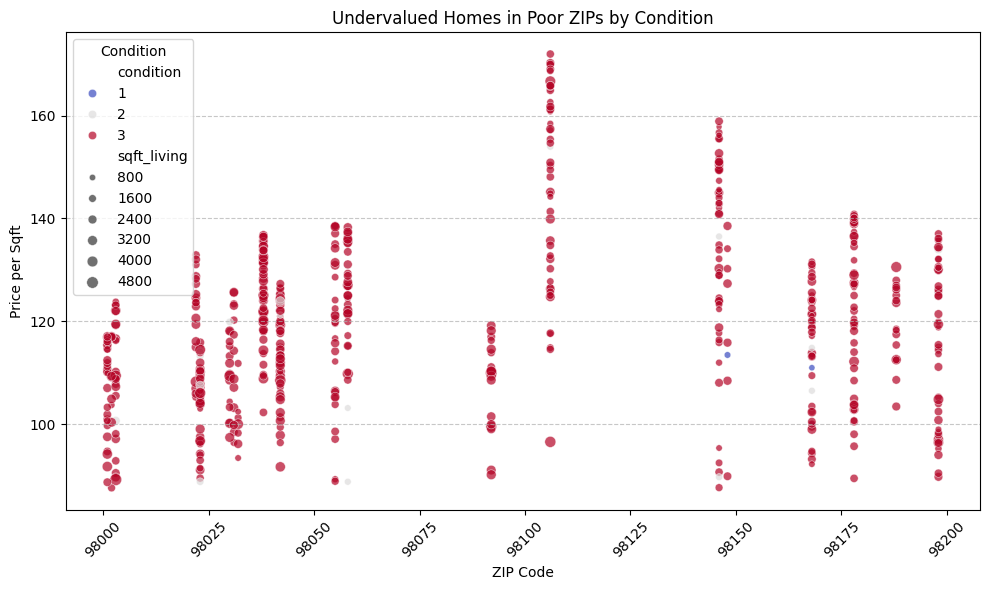

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=undervalued_targets,
    x='zipcode',
    y='price_per_sqft',
    hue='condition',   # Color by condition (1 = poor, 5 = excellent)
    palette='coolwarm',
    size='sqft_living',  # Optional: bubble size = house size
    alpha=0.7
)
plt.title('Undervalued Homes in Poor ZIPs by Condition')
plt.xlabel('ZIP Code')
plt.ylabel('Price per Sqft')
plt.legend(title='Condition')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Which older homes haven’t been renovated and might be good flip opportunities? withing the poor neighborhoods found !

In [61]:

# Select flip candidates:
# - built before 1970
# - never renovated (yr_renovated == 0)
# - condition is poor or fair (<= 3)
flip_candidates = df_poor[
    (df_poor['yr_built'] < 1970) &
    (df_poor['yr_renovated'] == 0) &
    (df_poor['condition'] <= 3)
]

# Optional: sort by affordability
flip_candidates = flip_candidates.sort_values('price_per_sqft')


In [62]:
flip_candidates[['zipcode', 'price', 'sqft_living', 'price_per_sqft', 'condition', 'yr_built']].head(10)


,zipcode,price,sqft_living,price_per_sqft,condition,yr_built
5211,98002,148900.000,1700.000,87.588,3,1967
1074,98146,149000.000,1700.000,87.647,3,1955
3036,98058,95000.000,1070.000,88.785,2,1948
3644,98023,135000.000,1520.000,88.816,2,1961
3372,98055,160000.000,1800.000,88.889,3,1962
2377,98003,452000.000,5067.000,89.205,3,1968
1597,98055,100000.000,1120.000,89.286,3,1939
924,98178,178000.000,1990.000,89.447,3,1960
3426,98146,104950.000,1170.000,89.701,2,1949
678,98198,210000.000,2340.000,89.744,3,1957


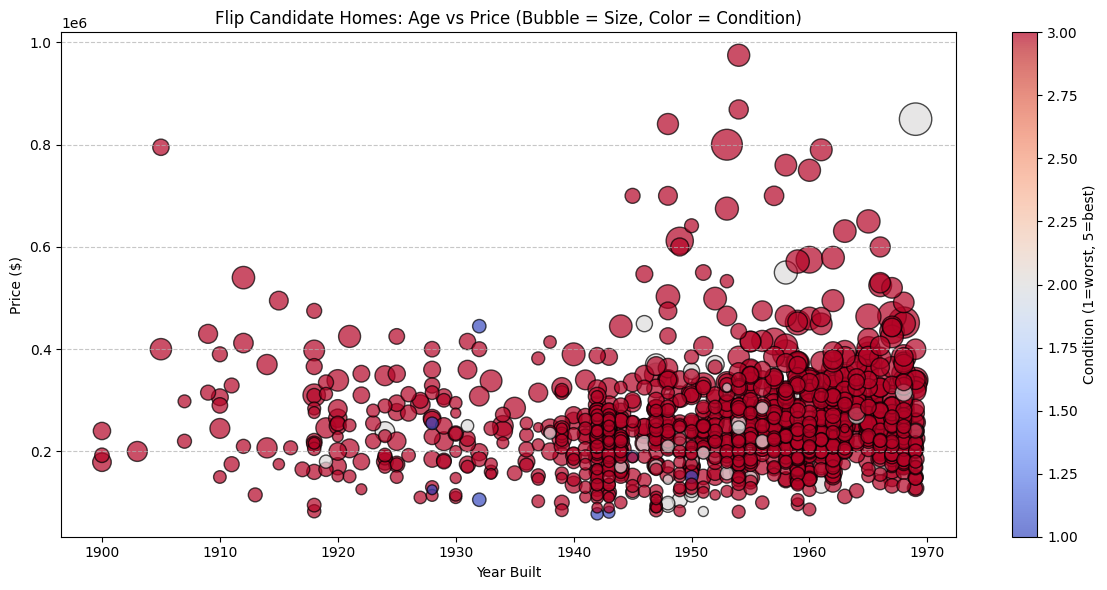

In [286]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    flip_candidates['yr_built'],
    flip_candidates['price'],
    s=flip_candidates['sqft_living'] / 10,  # bubble size (scaled down)
    c=flip_candidates['condition'],         # color = condition
    cmap='coolwarm',
    alpha=0.7,
    edgecolors='black'
)

plt.colorbar(scatter, label='Condition (1=worst, 5=best)')
plt.title('Flip Candidate Homes: Age vs Price (Bubble = Size, Color = Condition)')
plt.xlabel('Year Built')
plt.ylabel('Price ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



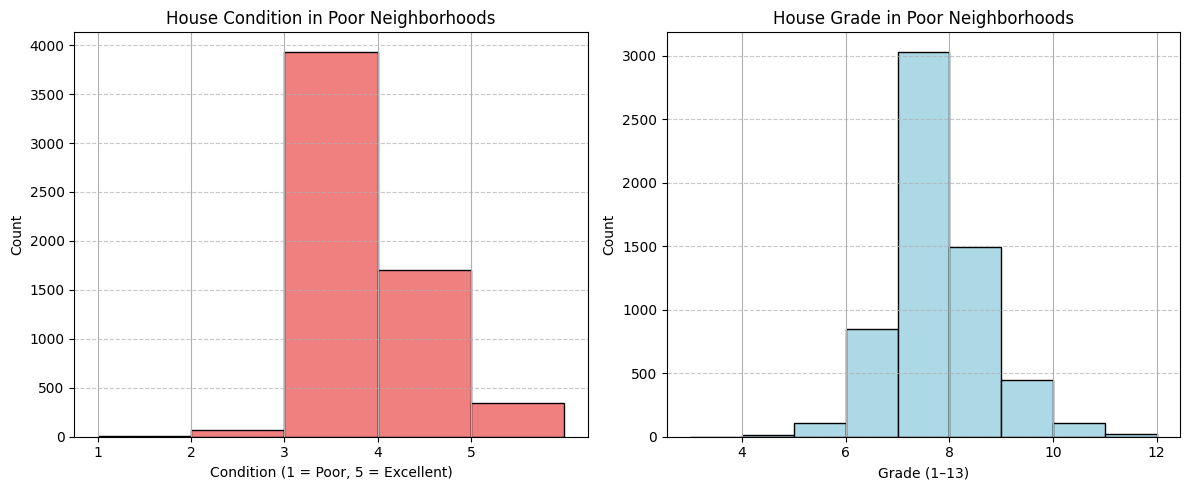

In [315]:
plt.figure(figsize=(12, 5))

# Histogram for condition
plt.subplot(1, 2, 1)
df_poor['condition'].hist(bins=range(1, 7), color='lightcoral', edgecolor='black')
plt.title('House Condition in Poor Neighborhoods')
plt.xlabel('Condition (1 = Poor, 5 = Excellent)')
plt.ylabel('Count')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for grade
plt.subplot(1, 2, 2)
df_poor['grade'].hist(bins=range(int(df_poor['grade'].min()), int(df_poor['grade'].max()) + 1), 
                      color='lightblue', edgecolor='black')
plt.title('House Grade in Poor Neighborhoods')
plt.xlabel('Grade (1–13)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Low-priced homes cluster in specific geographic areas (poor neighborhoods by zip!).

In [313]:
# Define threshold: 25th percentile price overall
price_threshold = df['price'].quantile(0.05)

# Filter low-priced homes
low_price_homes = df[df['price'] <= price_threshold]

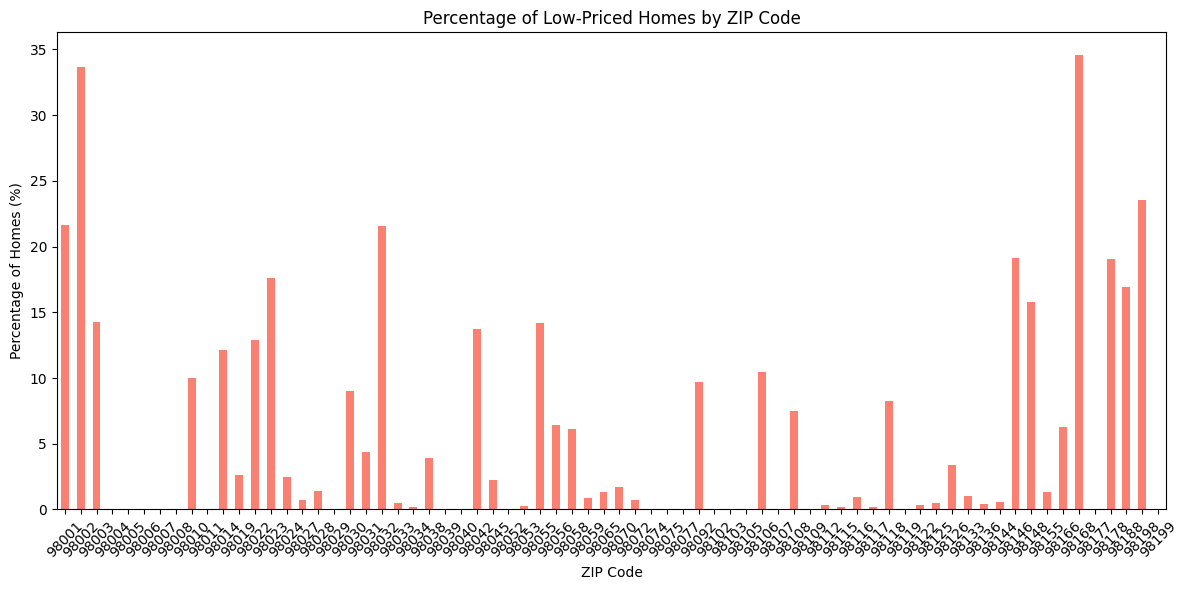

In [308]:
# Total homes per ZIP
total_by_zip = df['zipcode'].value_counts().sort_index()

# Low-priced homes per ZIP
low_price_by_zip = low_price_homes['zipcode'].value_counts().sort_index()

# Percentage of low-priced homes per ZIP
pct_low_price = (low_price_by_zip / total_by_zip * 100).fillna(0)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
pct_low_price.plot(kind='bar', color='salmon')
plt.title('Percentage of Low-Priced Homes by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Percentage of Homes (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


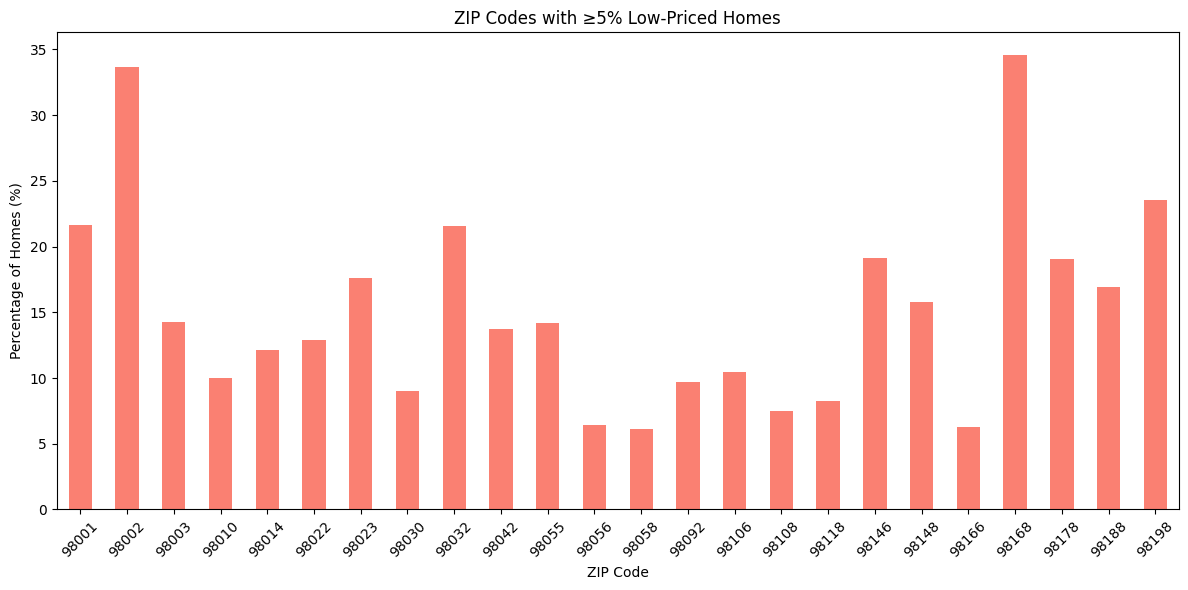

In [314]:
# Only keep ZIP codes where ≥ 5% of homes are low-priced
filtered_pct_low_price = pct_low_price[pct_low_price >= 5]  # You can adjust this threshold

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
filtered_pct_low_price.plot(kind='bar', color='salmon')
plt.title('ZIP Codes with ≥5% Low-Priced Homes')
plt.xlabel('ZIP Code')
plt.ylabel('Percentage of Homes (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


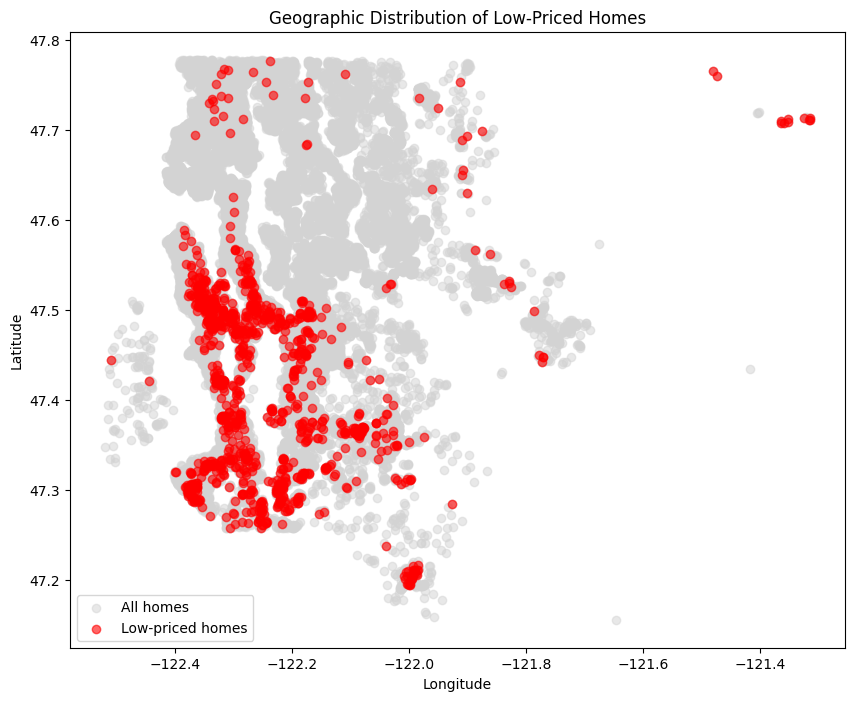

In [310]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(df['long'], df['lat'], c='lightgray', alpha=0.5, label='All homes')
plt.scatter(low_price_homes['long'], low_price_homes['lat'], c='red', alpha=0.6, label='Low-priced homes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Low-Priced Homes')
plt.legend()
plt.show()


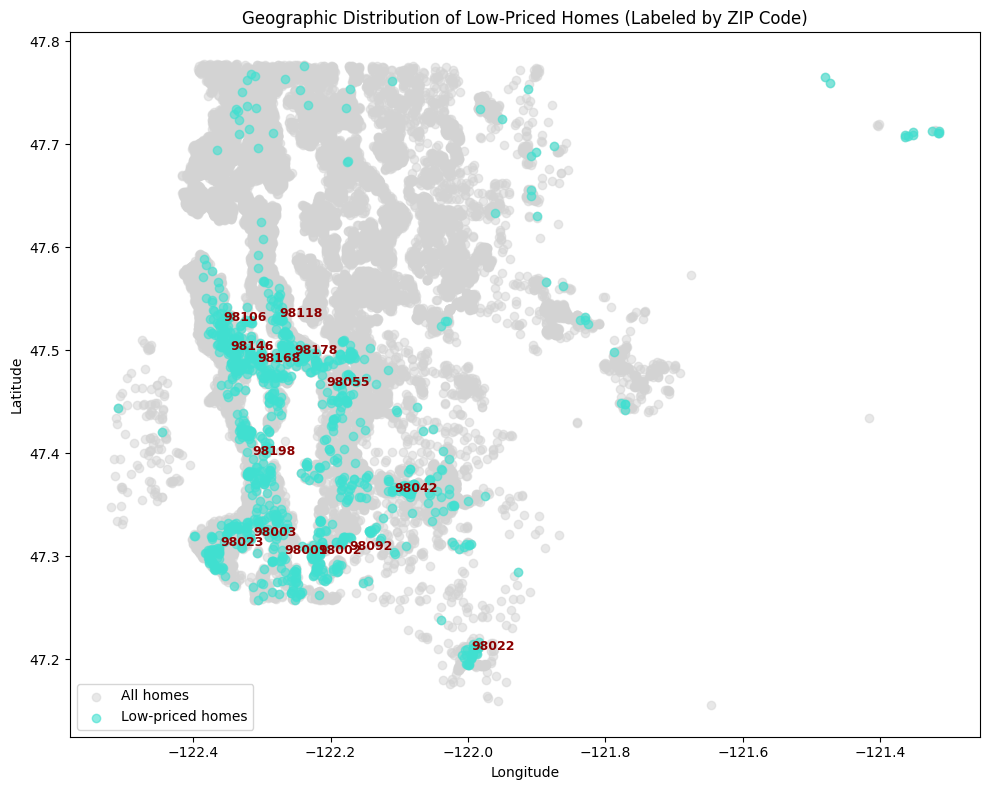

In [311]:
# Calculate centroid (average lat/long) for each ZIP with enough low-priced homes
#zip_centers = low_price_homes.groupby('zipcode')[['lat', 'long']].mean()

# filter ZIPs to show only the most relevant (e.g. ZIPs with ≥ 10 low-priced homes

counts = low_price_homes['zipcode'].value_counts()
relevant_zips = counts[counts >= 30].index
zip_centers = low_price_homes[low_price_homes['zipcode'].isin(relevant_zips)].groupby('zipcode')[['lat', 'long']].mean()

plt.figure(figsize=(10,8))

# Plot all homes
plt.scatter(df['long'], df['lat'], c='lightgray', alpha=0.5, label='All homes')

# Plot low-priced homes
plt.scatter(low_price_homes['long'], low_price_homes['lat'], c='turquoise', alpha=0.6, label='Low-priced homes')

# Add ZIP code labels at centroid positions
for zip_code, row in zip_centers.iterrows():
    plt.text(row['long'], row['lat'], str(zip_code), fontsize=9, fontweight='bold', color='darkred')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Low-Priced Homes (Labeled by ZIP Code)')
plt.legend()
plt.tight_layout()
plt.show()


What small improvements can increase home value without making prices too high for the community? Only in the poor neighborhoods

In [ ]:
condition_price_poor = df_poor.groupby(['zipcode', 'condition'])['price'].median().unstack()

In [138]:
# ZIPs that have both condition 3 and 4
condition_jump_poor = condition_price_poor[[4, 5]].dropna()

# Price difference
condition_jump_poor['diff_4_to_5'] = condition_jump_poor[5] - condition_jump_poor[4]

# Average gain in poor ZIPs
print("Average price increase (condition 4→5) in poor ZIPs:", condition_jump_poor['diff_4_to_5'].mean())



Average price increase (condition 4→5) in poor ZIPs: -3009.7


In [163]:
grade_price_poor = df_poor.groupby(['zipcode', 'grade'])['price'].median().unstack()

# ZIPs with both grade 7 and 8
grade_jump_poor = grade_price_poor[[7, 8]].dropna()

# Price difference
grade_jump_poor['diff_7_to_8'] = grade_jump_poor[8] - grade_jump_poor[7]

print("Average price increase (grade 7→8) in poor ZIPs:", grade_jump_poor['diff_7_to_8'].mean())


Average price increase (grade 7→8) in poor ZIPs: 72034.625


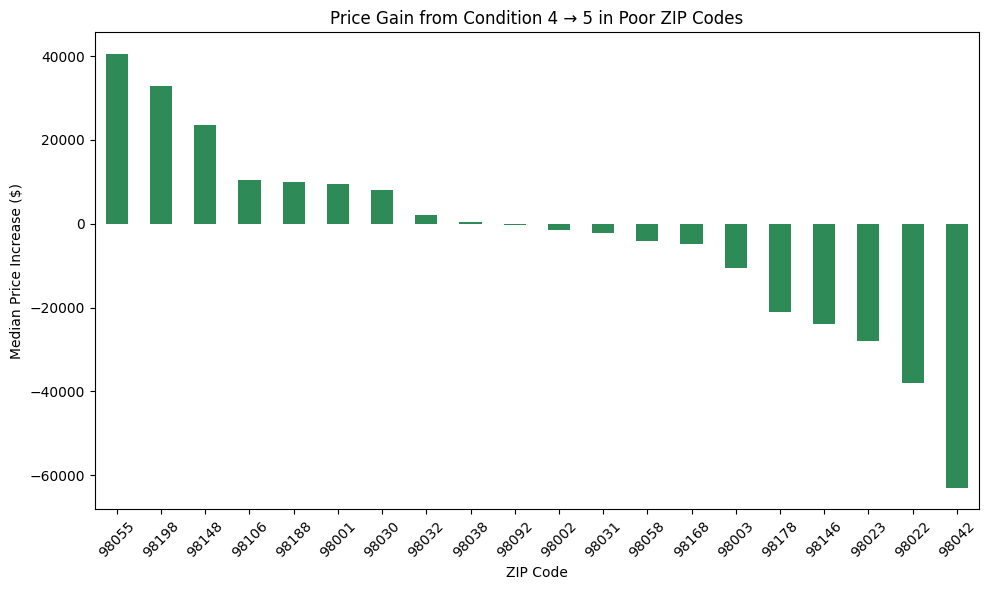

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
condition_jump_poor['diff_4_to_5'].sort_values(ascending=False).plot(kind='bar', color='seagreen')
plt.title('Price Gain from Condition 4 → 5 in Poor ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Median Price Increase ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


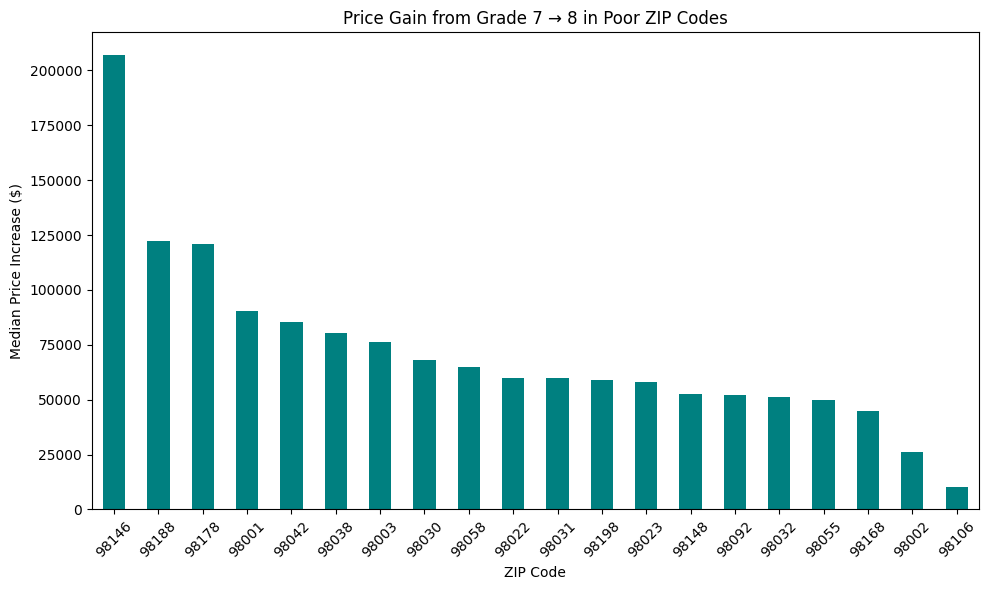

In [281]:


plt.figure(figsize=(10,6))
grade_jump_poor['diff_7_to_8'].sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Price Gain from Grade 7 → 8 in Poor ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Median Price Increase ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [162]:
print(df[(df["zipcode"] == 98002) & (df["condition"] == 4)]["price"].mean(), "condition 4")
print(df[(df["zipcode"] == 98002) & (df["condition"] == 5)]["price"].mean(), "condition 5")

df[(df["zipcode"] == 98002) & (df["grade"] == 6)]

219285.8137254902 condition 4
221641.08695652173 condition 5


,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
25,2014-11-03,233000.000,1202000200,26,3.000,2.000,1710.000,4697.000,1.500,0.000,...,1710.000,0.000,1941,0.000,98002,47.305,-122.218,1030.000,4705.000,False
243,2015-04-27,225000.000,6131600075,244,3.000,1.000,1300.000,8316.000,1.000,0.000,...,1300.000,0.000,1954,0.000,98002,47.322,-122.216,1260.000,8316.000,False
636,2014-08-15,214000.000,6131600060,637,3.000,1.000,1200.000,8316.000,1.000,0.000,...,1200.000,0.000,1953,0.000,98002,47.322,-122.215,1200.000,8316.000,False
1231,2015-04-30,208000.000,1450100070,1232,3.000,1.000,990.000,7420.000,1.000,0.000,...,990.000,0.000,1960,0.000,98002,47.290,-122.221,1010.000,7420.000,False
1995,2014-11-14,180000.000,3915500045,1996,3.000,1.000,1010.000,8581.000,1.000,0.000,...,1010.000,0.000,1920,0.000,98002,47.304,-122.216,1060.000,10354.000,False
2068,2015-05-05,370000.000,8699100240,2069,6.000,2.750,3240.000,5750.000,1.000,0.000,...,2160.000,1080.000,1950,0.000,98002,47.305,-122.221,1230.000,5750.000,False
2270,2014-06-16,183000.000,3313600340,2271,3.000,1.750,1070.000,8100.000,1.000,0.000,...,1070.000,0.000,1957,0.000,98002,47.285,-122.220,1260.000,8100.000,False
2522,2014-06-20,175000.000,835000055,2523,2.000,1.000,1020.000,5130.000,1.000,0.000,...,1020.000,0.000,1948,0.000,98002,47.301,-122.226,1200.000,6497.000,False
3012,2015-04-17,219950.000,16000015,3013,3.000,1.500,1070.000,6601.000,1.000,0.000,...,1070.000,0.000,1985,0.000,98002,47.312,-122.209,1030.000,6614.000,False
4096,2014-10-14,125000.000,7140800100,4097,3.000,1.000,920.000,7276.000,1.000,0.000,...,920.000,0.000,1961,0.000,98002,47.285,-122.211,1120.000,7276.000,False


Which neighborhoods have room for improvement?
Are there ZIP codes where homes are mostly low grade, poor condition, not renovated?

In [316]:
low_quality = df[
    (df['grade'] <= 6) &
    (df['condition'] <= 3) &
    (df['yr_renovated'] == 0)  
]


In [151]:
low_quality_counts = low_quality['zipcode'].value_counts()


In [152]:
total_counts = df['zipcode'].value_counts()

# Proportion of low quality homes per ZIP
low_quality_pct = (low_quality_counts / total_counts).fillna(0)


In [154]:
summary = pd.DataFrame({
    'total_homes': total_counts,
    'low_quality_homes': low_quality_counts,
    'pct_low_quality': low_quality_pct
}).fillna(0)

# Sort ZIPs with highest percentage of low quality homes first
summary = summary.sort_values(by='pct_low_quality', ascending=False)
print(summary.head(20))


         total_homes  low_quality_homes  pct_low_quality
zipcode                                                 
98168            269             92.000            0.342
98146            288             82.000            0.285
98106            335             76.000            0.227
98178            262             58.000            0.221
98118            507            103.000            0.203
98126            354             65.000            0.184
98024             80             14.000            0.175
98014            124             17.000            0.137
98055            268             34.000            0.127
98108            186             23.000            0.124
98148             57              7.000            0.123
98166            254             30.000            0.118
98188            136             15.000            0.110
98070            117             11.000            0.094
98125            409             36.000            0.088
98155            446           

In [246]:
# Define thresholds
lower_bound = df['price'].quantile(0.05)
upper_bound = df['price'].quantile(0.95)

# Filter dataset
#df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_filtered = df

In [247]:
zip_summary = df_filtered.groupby('zipcode').agg({
    'price': 'mean',
    'grade': 'mean',
    'condition': 'mean'
}).reset_index()


In [248]:
print(zip_summary[['price', 'grade', 'condition']].corr())


           price  grade  condition
price      1.000  0.808      0.198
grade      0.808  1.000      0.020
condition  0.198  0.020      1.000


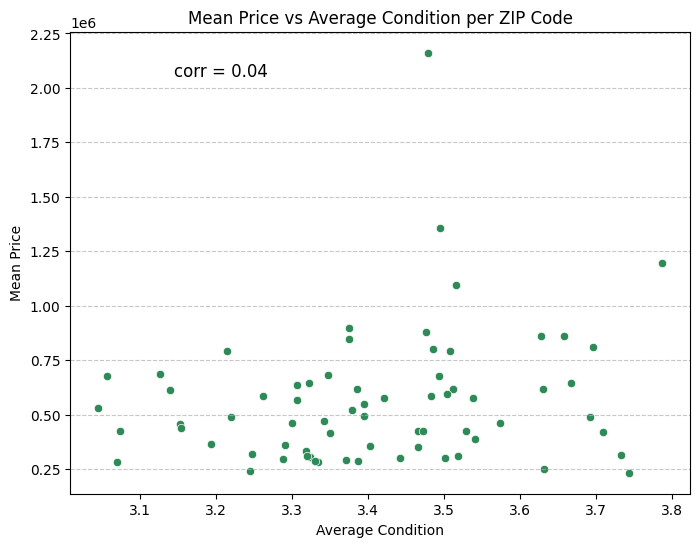

In [278]:
# Extract correlation between price and condition
r = corr_matrix.loc['price', 'condition']

plt.figure(figsize=(8,6))
sns.scatterplot(data=zip_summary, x='condition', y='price', color='seagreen')
plt.title('Mean Price vs Average Condition per ZIP Code')
plt.xlabel('Average Condition')
plt.ylabel('Mean Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add correlation text
plt.text(
    x=zip_summary['condition'].min() + 0.1,
    y=zip_summary['price'].max() * 0.95,
    s=f"corr = {r:.2f}",
    fontsize=12,
    color='black'
)

plt.show()



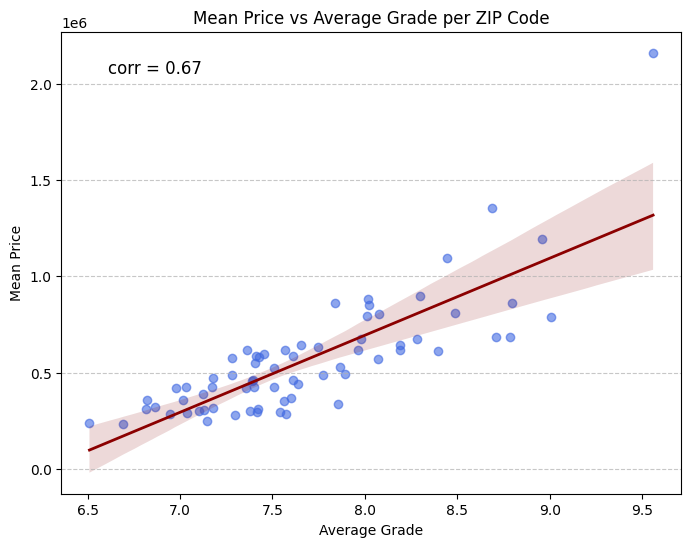

In [277]:
# Extract correlation between price and grade
r = corr_matrix.loc['price', 'grade']

# Plot with regression line and correlation value
plt.figure(figsize=(8,6))
sns.regplot(
    data=zip_summary,
    x='grade',
    y='price',
    scatter_kws={'color': 'royalblue', 'alpha': 0.6},
    line_kws={'color': 'darkred', 'linewidth': 2}
)
plt.title('Mean Price vs Average Grade per ZIP Code')
plt.xlabel('Average Grade')
plt.ylabel('Mean Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add correlation text to plot
plt.text(
    x=zip_summary['grade'].min() + 0.1,
    y=zip_summary['price'].max() * 0.95,
    s=f"corr = {r:.2f}",
    fontsize=12,
    color='black'
)

plt.show()


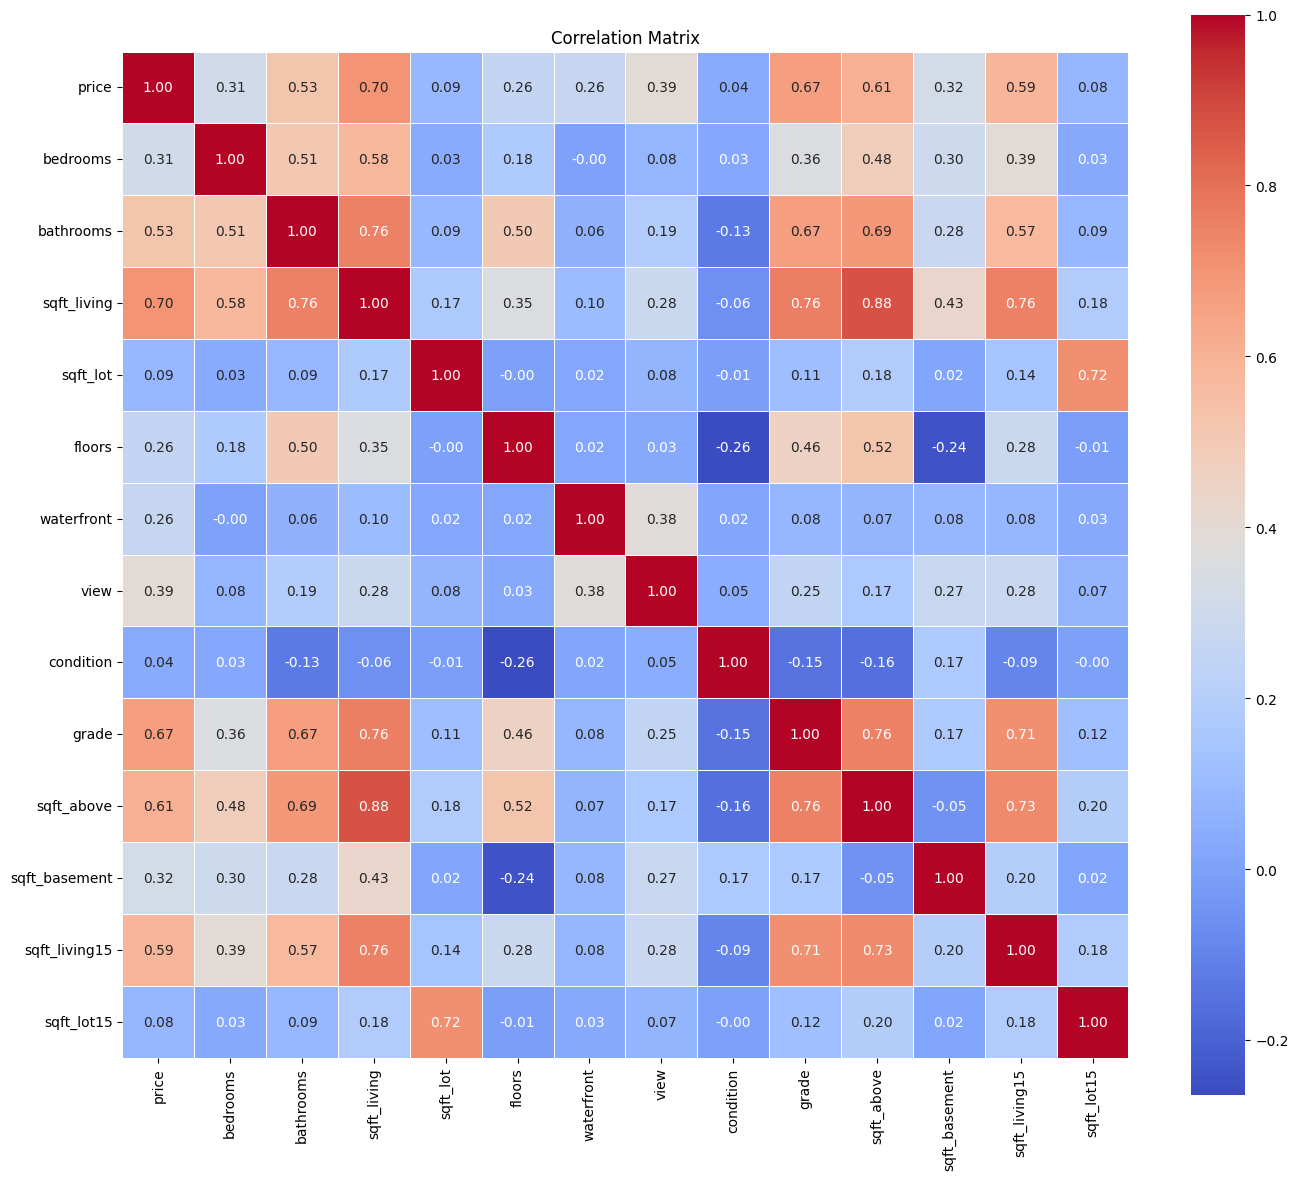

In [264]:


# Drop columns that are not meaningful for correlation
columns_to_drop = ['id', 'id.1', 'house_id', 'price_per_sqft', "lat","long","renovated","yr_built","yr_renovated","zipcode"]
df_corr = df.drop(columns=columns_to_drop, errors='ignore')

# Compute correlation matrix
corr_matrix = df_corr.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



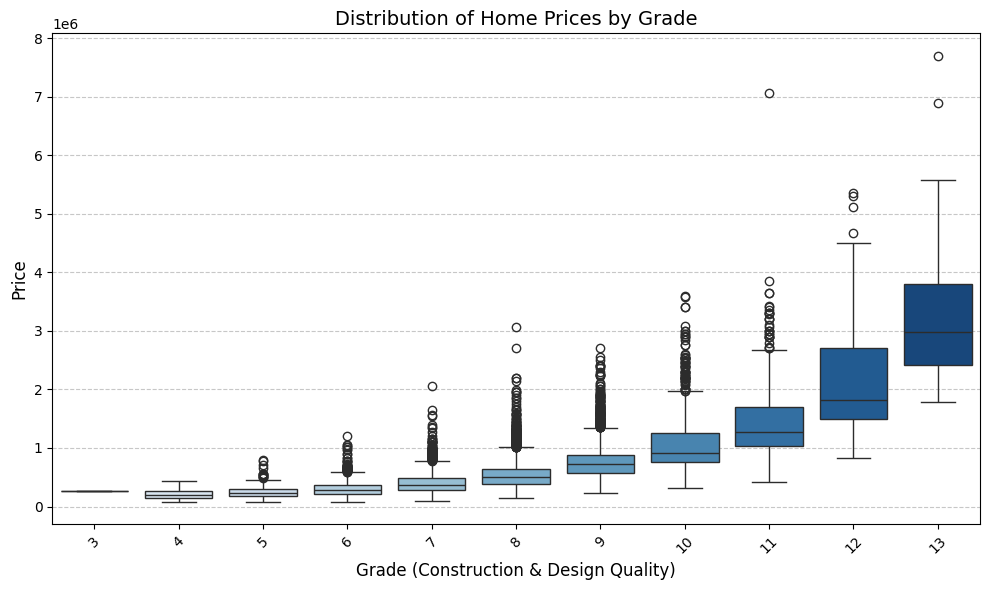

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='grade', y='price', palette='Blues')

plt.title('Distribution of Home Prices by Grade', fontsize=14)
plt.xlabel('Grade (Construction & Design Quality)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
